# Load Dataset

In [1]:
import pandas as pd

# Memuat dataset CSV
df = pd.read_csv('diabetes.csv')

# Menampilkan 5 baris pertama dari dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Periksa Dimensi Dataset

In [2]:
df.shape

(768, 9)

# Periksa Tipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Periksa Ringkasan Statistik

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Validasi Data

## Cek Missing Values di Setiap Kolom

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Cek Data Duplikat

In [6]:
# Mengecek jumlah duplikat di seluruh dataset
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


# Feature Selection - RFE dengan Permutation Importance

# Melakukan Feature Selection

In [7]:
# Menghapus fitur yang tidak diperlukan
df = df.drop(columns=['SkinThickness', 'Pregnancies', 'Insulin'])

# Menampilkan 5 baris pertama dari dataset setelah penghapusan
print(df.head())


   Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  Outcome
0      148             72  33.6                     0.627   50        1
1       85             66  26.6                     0.351   31        0
2      183             64  23.3                     0.672   32        1
3       89             66  28.1                     0.167   21        0
4      137             40  43.1                     2.288   33        1


# Membagi Dataset Berdasarkan Tipe Data

In [8]:
import pandas as pd

# Membagi kolom berdasarkan tipe data
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # Kolom kategorikal

# Khusus fitur Outcome sebagai kategorikal
categorical_features = list(categorical_features)  # Konversi ke list
if 'Outcome' in df.columns:
    categorical_features.append('Outcome')  # Tambahkan fitur 'Outcome' sebagai kategorikal
    numerical_features = numerical_features.drop('Outcome')  # Hapus 'Outcome' dari fitur numerik

## Data Numerik

In [9]:
print("Kolom Numerik:")
print(numerical_features)
df_numerical = df[numerical_features]
print("\nDataset Numerik:")
print(df_numerical.head())

Kolom Numerik:
Index(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype='object')

Dataset Numerik:
   Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age
0      148             72  33.6                     0.627   50
1       85             66  26.6                     0.351   31
2      183             64  23.3                     0.672   32
3       89             66  28.1                     0.167   21
4      137             40  43.1                     2.288   33


## Data Kategorikal

In [10]:
print("\nKolom Kategorikal:")
print(categorical_features)
df_categorical = df[categorical_features]
print("\nDataset Kategorikal:")
print(df_categorical.head())


Kolom Kategorikal:
['Outcome']

Dataset Kategorikal:
   Outcome
0        1
1        0
2        1
3        0
4        1


# Melakukan Normalisasi dengan Metode Min-Max Scaling

## Normalisasi pada Data Numerikal, Data Kategorikal Tidak di Normalisasi

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Melakukan normalisasi pada fitur numerik
df_numerical_scaled = scaler.fit_transform(df_numerical)

# Mengonversi hasil normalisasi kembali ke DataFrame
df_numerical_scaled = pd.DataFrame(df_numerical_scaled, columns=numerical_features)

# Menggabungkan dataset numerik yang sudah dinormalisasi dengan dataset kategorikal
df_combined = pd.concat([df_numerical_scaled, df_categorical], axis=1)

# Mengekspor dataset gabungan ke CSV
df_combined.to_csv('normalized_data.csv', index=False)

print("\nData yang sudah dinormalisasi telah diekspor ke 'normalized_data.csv'")



Data yang sudah dinormalisasi telah diekspor ke 'normalized_data.csv'


## Tampilkan Data Sebelum dan Sesudah Normalisasi

In [12]:
# Menggabungkan dataset numerik sebelum dan sesudah normalisasi dengan dataset kategorikal
df_combined_before_after = pd.concat([df_numerical, df_numerical_scaled, df_categorical], axis=1, keys=["Before Normalization", "After Normalization", "Categorical"])

# Menampilkan dataset gabungan sebelum dan sesudah normalisasi
print("\nDataset Sebelum dan Sesudah Normalisasi:")
print(df_combined_before_after.head())



Dataset Sebelum dan Sesudah Normalisasi:
  Before Normalization                                                   \
               Glucose BloodPressure   BMI DiabetesPedigreeFunction Age   
0                  148            72  33.6                    0.627  50   
1                   85            66  26.6                    0.351  31   
2                  183            64  23.3                    0.672  32   
3                   89            66  28.1                    0.167  21   
4                  137            40  43.1                    2.288  33   

  After Normalization                                                   \
              Glucose BloodPressure       BMI DiabetesPedigreeFunction   
0            0.743719      0.590164  0.500745                 0.234415   
1            0.427136      0.540984  0.396423                 0.116567   
2            0.919598      0.524590  0.347243                 0.253629   
3            0.447236      0.540984  0.418778                 

# Membagi Dataset Menjadi Data Training dan Data Testing

In [13]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data training dan data testing (80% training, 20% testing)
X = df_combined.drop(columns='Outcome')  # Fitur (tanpa Outcome)
y = df_combined['Outcome']  # Target (Outcome)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan fitur dan target untuk data training dan testing
data_training = pd.concat([X_train, y_train], axis=1)
data_testing = pd.concat([X_test, y_test], axis=1)

# Mengekspor data training dan testing ke CSV
data_training.to_csv('data_training.csv', index=False)
data_testing.to_csv('data_testing.csv', index=False)


## Data Training

In [14]:
# Menampilkan Data Training
print("Data Training:")
print(data_training.head())


Data Training:
      Glucose  BloodPressure       BMI  DiabetesPedigreeFunction       Age  \
60   0.422111       0.000000  0.000000                  0.096499  0.000000   
618  0.562814       0.672131  0.420268                  0.514091  0.483333   
346  0.698492       0.377049  0.427720                  0.245944  0.016667   
294  0.809045       0.409836  0.326379                  0.075149  0.733333   
231  0.673367       0.655738  0.688525                  0.068318  0.416667   

     Outcome  
60         0  
618        1  
346        0  
294        0  
231        1  


## Data Testing

In [15]:
# Menampilkan Data Training
print("Data Training:")
print(data_training.head())


Data Training:
      Glucose  BloodPressure       BMI  DiabetesPedigreeFunction       Age  \
60   0.422111       0.000000  0.000000                  0.096499  0.000000   
618  0.562814       0.672131  0.420268                  0.514091  0.483333   
346  0.698492       0.377049  0.427720                  0.245944  0.016667   
294  0.809045       0.409836  0.326379                  0.075149  0.733333   
231  0.673367       0.655738  0.688525                  0.068318  0.416667   

     Outcome  
60         0  
618        1  
346        0  
294        0  
231        1  


# Latih Model KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Define values of K
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Dictionary to store models and their classification reports
knn_models = {}
knn_reports = {}

# Train KNN models using the resampled data and store models
for k in k_values:
    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model on the resampled data
    knn.fit(X_train, y_train)
    
    # Store the trained model
    knn_models[k] = knn
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Generate and store classification report
    knn_reports[k] = classification_report(y_test, y_pred)


# Evaluasi Model

In [17]:
# Evaluate each model and print classification report
for k, knn in knn_models.items():
    # Predict on the test set
    y_pred = knn.predict(X_test)
    
    # Generate classification report
    report = classification_report(y_test, y_pred, target_names=["0", "1"])
    knn_reports[k] = report
    
    print(f"Classification Report for K={k}:\n")
    print(report)
    print("="*150)


Classification Report for K=1:

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        99
           1       0.56      0.65      0.61        55

    accuracy                           0.69       154
   macro avg       0.68      0.69      0.68       154
weighted avg       0.71      0.69      0.70       154

Classification Report for K=3:

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

Classification Report for K=5:

              precision    recall  f1-score   support

           0       0.82      0.81      0.82        99
           1       0.67      0.69      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.7

# Visualisasi Akurasi Setiap Nilai K

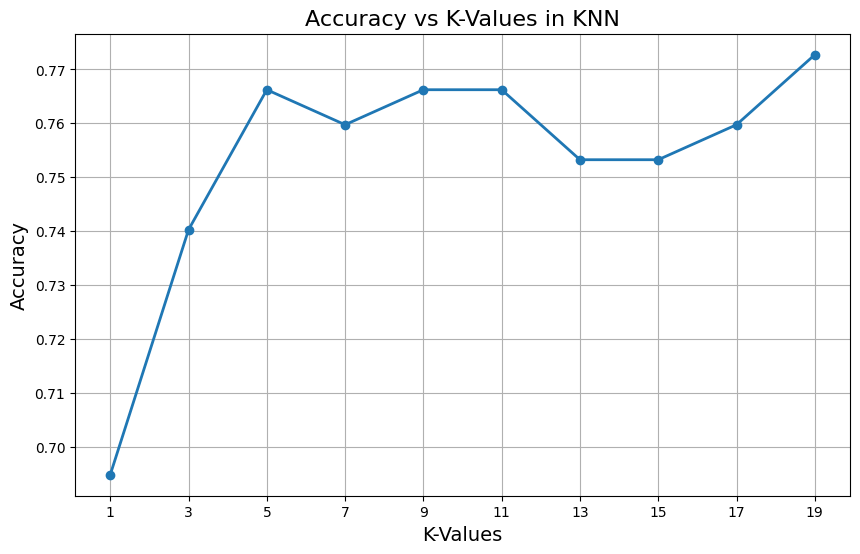

Accuracies for each K:
K = 1, Accuracy = 0.69
K = 3, Accuracy = 0.74
K = 5, Accuracy = 0.77
K = 7, Accuracy = 0.76
K = 9, Accuracy = 0.77
K = 11, Accuracy = 0.77
K = 13, Accuracy = 0.75
K = 15, Accuracy = 0.75
K = 17, Accuracy = 0.76
K = 19, Accuracy = 0.77


In [18]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Recalculate accuracies using the already trained models
knn_accuracies = {}

for k, knn in knn_models.items():
    # Calculate accuracy for each K value
    accuracy = accuracy_score(y_test, knn.predict(X_test))
    knn_accuracies[k] = accuracy

# Prepare data for visualization
k_values = list(knn_accuracies.keys())
accuracies = list(knn_accuracies.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', linewidth=2)
plt.title('Accuracy vs K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Display the list of accuracies
accuracy_list = [{"K": k, "Accuracy": acc} for k, acc in knn_accuracies.items()]
print("Accuracies for each K:")
for item in accuracy_list:
    print(f"K = {item['K']}, Accuracy = {item['Accuracy']:.2f}")


# Visualisasi Precision, Recall, and F1-Score Setiap Nilai K

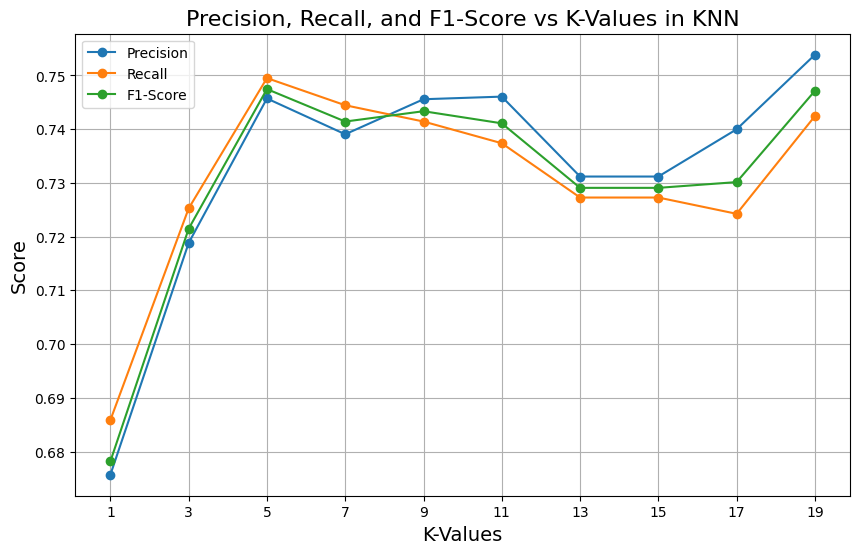

K = 1: Precision = 0.68, Recall = 0.69, F1-Score = 0.68
K = 3: Precision = 0.72, Recall = 0.73, F1-Score = 0.72
K = 5: Precision = 0.75, Recall = 0.75, F1-Score = 0.75
K = 7: Precision = 0.74, Recall = 0.74, F1-Score = 0.74
K = 9: Precision = 0.75, Recall = 0.74, F1-Score = 0.74
K = 11: Precision = 0.75, Recall = 0.74, F1-Score = 0.74
K = 13: Precision = 0.73, Recall = 0.73, F1-Score = 0.73
K = 15: Precision = 0.73, Recall = 0.73, F1-Score = 0.73
K = 17: Precision = 0.74, Recall = 0.72, F1-Score = 0.73
K = 19: Precision = 0.75, Recall = 0.74, F1-Score = 0.75


In [19]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Initialize dictionaries to store metrics
precision_results = {}
recall_results = {}
f1_score_results = {}

# Calculate metrics for each K value
for k, knn in knn_models.items():
    # Predict the outcomes
    y_pred = knn.predict(X_test)
    
    # Generate classification report as a dictionary
    report = classification_report(y_test, y_pred, output_dict=True)

    # # Store metrics for the positive class (label '1')
    # precision_results[k] = report['1']['precision']
    # recall_results[k] = report['1']['recall']
    # f1_score_results[k] = report['1']['f1-score']
    
    # Store metrics from macro avg
    precision_results[k] = report['macro avg']['precision']
    recall_results[k] = report['macro avg']['recall']
    f1_score_results[k] = report['macro avg']['f1-score']

# Visualize precision, recall, and f1-score
plt.figure(figsize=(10, 6))
plt.plot(precision_results.keys(), precision_results.values(), marker='o', label='Precision')
plt.plot(recall_results.keys(), recall_results.values(), marker='o', label='Recall')
plt.plot(f1_score_results.keys(), f1_score_results.values(), marker='o', label='F1-Score')
plt.title('Precision, Recall, and F1-Score vs K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xticks(list(precision_results.keys()))
plt.legend()
plt.grid(True)
plt.show()

# Display the results in a tabular format
for k in precision_results.keys():
    print(f"K = {k}: Precision = {precision_results[k]:.2f}, Recall = {recall_results[k]:.2f}, F1-Score = {f1_score_results[k]:.2f}")


# Hitung P-Values dengan ANOVA

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

# Dictionary to store cross-validation results for each K
cv_results = {}

# Perform K-fold Cross Validation for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold CV
    cv_results[k] = cv_scores

# Display the cross-validation results
for k, scores in cv_results.items():
    print(f"K = {k}, Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.2f}, Standard Deviation: {scores.std():.2f}")
    print("="*150)

# Perform ANOVA to check if there's a significant difference in accuracies across K values
f_stat, p_value = stats.f_oneway(*list(cv_results.values()))

# Display p-value from ANOVA
print(f"ANOVA p-value: {p_value:.2f}")

# Interpretation of p-value
if p_value < 0.05:
    print("There is a statistically significant difference between the models with different K values.")
else:
    print("There is no statistically significant difference between the models with different K values.")


K = 1, Cross-Validation Accuracy Scores: [0.67479675 0.72357724 0.63414634 0.72357724 0.70491803]
Mean Accuracy: 0.69, Standard Deviation: 0.03
K = 3, Cross-Validation Accuracy Scores: [0.69918699 0.7398374  0.69918699 0.74796748 0.69672131]
Mean Accuracy: 0.72, Standard Deviation: 0.02
K = 5, Cross-Validation Accuracy Scores: [0.67479675 0.76422764 0.73170732 0.71544715 0.69672131]
Mean Accuracy: 0.72, Standard Deviation: 0.03
K = 7, Cross-Validation Accuracy Scores: [0.72357724 0.72357724 0.73170732 0.7398374  0.70491803]
Mean Accuracy: 0.72, Standard Deviation: 0.01
K = 9, Cross-Validation Accuracy Scores: [0.74796748 0.79674797 0.74796748 0.77235772 0.70491803]
Mean Accuracy: 0.75, Standard Deviation: 0.03
K = 11, Cross-Validation Accuracy Scores: [0.73170732 0.78861789 0.76422764 0.78861789 0.7295082 ]
Mean Accuracy: 0.76, Standard Deviation: 0.03
K = 13, Cross-Validation Accuracy Scores: [0.72357724 0.80487805 0.76422764 0.7804878  0.7704918 ]
Mean Accuracy: 0.77, Standard Deviat

# Visualisasi Boxplot Cross-Validation Akurasi

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11664\285511740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(list(cv_results.values()), labels=k_values, patch_artist=True,


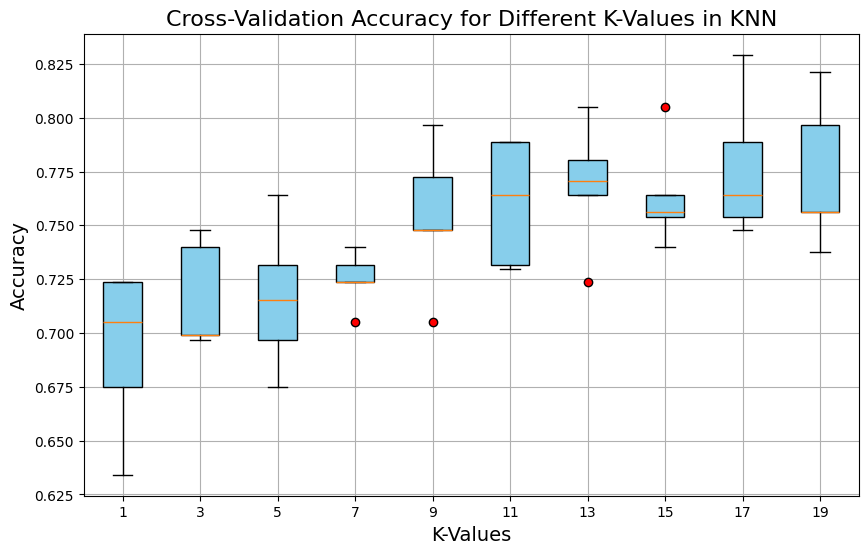

In [21]:
import matplotlib.pyplot as plt

# Plotting the boxplots to visualize the distribution of accuracy scores across K values
plt.figure(figsize=(10, 6))
plt.boxplot(list(cv_results.values()), labels=k_values, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'), flierprops=dict(markerfacecolor='r', marker='o', markersize=6))
plt.title('Cross-Validation Accuracy for Different K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(True)
plt.show()


# Hitung Specificity

In [22]:
from sklearn.metrics import confusion_matrix

# Calculate specificity for each K value
specificity_results = {}

for k, knn in knn_models.items():
    # Predict the outcomes
    y_pred = knn.predict(X_test)
    
    # Get confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    # Calculate specificity
    specificity = tn / (tn + fp)
    specificity_results[k] = specificity

# Display specificity results
print("Specificity for each K:")
for k, specificity in specificity_results.items():
    print(f"K = {k}, Specificity = {specificity:.2f}")


Specificity for each K:
K = 1, Specificity = 0.72
K = 3, Specificity = 0.78
K = 5, Specificity = 0.81
K = 7, Specificity = 0.80
K = 9, Specificity = 0.83
K = 11, Specificity = 0.84
K = 13, Specificity = 0.82
K = 15, Specificity = 0.82
K = 17, Specificity = 0.85
K = 19, Specificity = 0.85


# Visualisasi Specificity

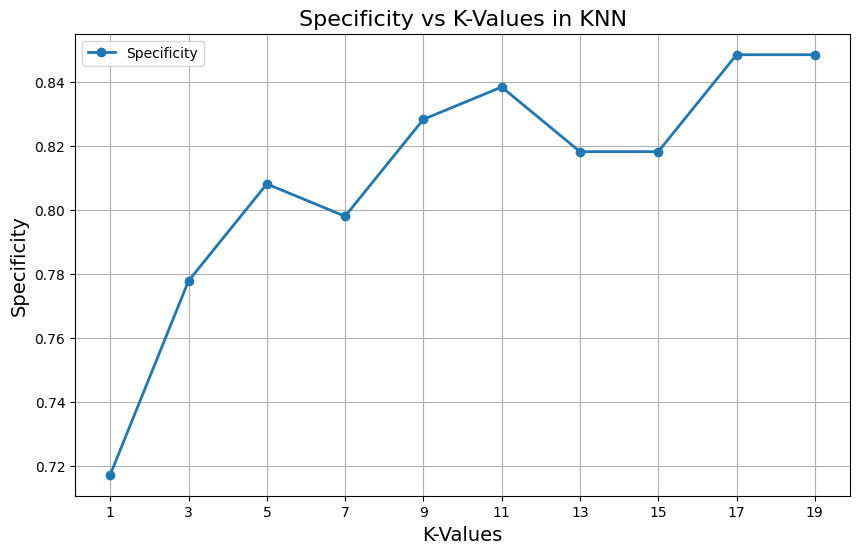

In [23]:
import matplotlib.pyplot as plt

# Visualize specificity results
k_values = list(specificity_results.keys())
specificities = list(specificity_results.values())

plt.figure(figsize=(10, 6))
plt.plot(k_values, specificities, marker='o', linestyle='-', linewidth=2, label='Specificity')
plt.title('Specificity vs K-Values in KNN', fontsize=16)
plt.xlabel('K-Values', fontsize=14)
plt.ylabel('Specificity', fontsize=14)
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.show()
